## Life Expectancy

In [1]:
import pandas as pd
import requests, zipfile, io
import re
import os

data_dir = '../data'
cache_dir = os.path.join(data_dir, 'cache')

def unzip_data(zip_url:str, path=cache_dir):
    response = requests.get(zip_url)
    zip = zipfile.ZipFile(io.BytesIO(response.content))
    files = zip.namelist()
    zip.extractall(path=path)
    return tuple([os.path.join(path, f) for f in zip.namelist()])

In [2]:
unzip_data('https://www150.statcan.gc.ca/n1/tbl/csv/39100007-eng.zip')

('../data\\cache\\39100007.csv', '../data\\cache\\39100007_MetaData.csv')

In [3]:
data = pd.read_csv(os.path.join(cache_dir, '39100007.csv'))
data

,REF_DATE,GEO,DGUID,Age group,Sex,Element,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1980/1982,Canada,2016A000011124,0 year,Both sexes,Number of survivors at age x (lx),Number,223,units,0,v95651838,1.1.1.16,1.000000e+05,NaN,NaN,NaN,0
1,1980/1982,Canada,2016A000011124,0 year,Both sexes,Number of deaths between age x and x+n (dx),Number,223,units,0,v95652228,1.1.1.17,9.760000e+02,NaN,NaN,NaN,0
2,1980/1982,Canada,2016A000011124,0 year,Both sexes,Death probability between age x and x+n (qx),Number,223,units,0,v95652618,1.1.1.18,9.760000e-03,NaN,NaN,NaN,5
3,1980/1982,Canada,2016A000011124,0 year,Both sexes,Margin of error associated with the death prob...,Number,223,units,0,v95653008,1.1.1.19,1.800000e-04,NaN,NaN,NaN,5
4,1980/1982,Canada,2016A000011124,0 year,Both sexes,Probability of survival between age x and x+n ...,Number,223,units,0,v95653398,1.1.1.20,9.902400e-01,NaN,NaN,NaN,5
5,1980/1982,Canada,2016A000011124,0 year,Both sexes,Number of life years lived between age x and x...,Number,223,units,0,v95653788,1.1.1.21,9.915200e+04,NaN,NaN,NaN,0
6,1980/1982,Canada,2016A000011124,0 year,Both sexes,Cumulative number of life years lived beyond a...,Number,223,units,0,v95654178,1.1.1.22,7.543058e+06,NaN,NaN,NaN,0
7,1980/1982,Canada,2016A000011124,0 year,Both sexes,Life expectancy (in years) at age x (ex),Number,223,units,0,v95654568,1.1.1.23,7.540000e+01,NaN,NaN,NaN,1
8,1980/1982,Canada,2016A000011124,0 year,Both sexes,Margin of error associated with the life expec...,Number,223,units,0,v95654958,1.1.1.24,0.000000e+00,NaN,NaN,NaN,1
9,1980/1982,Canada,2016A000011124,0 year,Males,Number of survivors at age x (lx),Number,223,units,0,v95651968,1.1.2.16,1.000000e+05,NaN,NaN,NaN,0


In [4]:
for index, group in data.groupby(['Age group','Sex','Element']):
    print(index)

('0 year', 'Both sexes', 'Cumulative number of life years lived beyond age x (Tx)')
('0 year', 'Both sexes', 'Death probability between age x and x+n (qx)')
('0 year', 'Both sexes', 'Life expectancy (in years) at age x (ex)')
('0 year', 'Both sexes', 'Margin of error associated with the death probability (m.e.(qx))')
('0 year', 'Both sexes', 'Margin of error associated with the life expectancy (m.e.(ex))')
('0 year', 'Both sexes', 'Number of deaths between age x and x+n (dx)')
('0 year', 'Both sexes', 'Number of life years lived between age x and x+n (Lx)')
('0 year', 'Both sexes', 'Number of survivors at age x (lx)')
('0 year', 'Both sexes', 'Probability of survival between age x and x+n (px)')
('0 year', 'Females', 'Cumulative number of life years lived beyond age x (Tx)')
('0 year', 'Females', 'Death probability between age x and x+n (qx)')
('0 year', 'Females', 'Life expectancy (in years) at age x (ex)')
('0 year', 'Females', 'Margin of error associated with the death probability (

('12 years', 'Both sexes', 'Number of survivors at age x (lx)')
('12 years', 'Both sexes', 'Probability of survival between age x and x+n (px)')
('12 years', 'Females', 'Cumulative number of life years lived beyond age x (Tx)')
('12 years', 'Females', 'Death probability between age x and x+n (qx)')
('12 years', 'Females', 'Life expectancy (in years) at age x (ex)')
('12 years', 'Females', 'Margin of error associated with the death probability (m.e.(qx))')
('12 years', 'Females', 'Margin of error associated with the life expectancy (m.e.(ex))')
('12 years', 'Females', 'Number of deaths between age x and x+n (dx)')
('12 years', 'Females', 'Number of life years lived between age x and x+n (Lx)')
('12 years', 'Females', 'Number of survivors at age x (lx)')
('12 years', 'Females', 'Probability of survival between age x and x+n (px)')
('12 years', 'Males', 'Cumulative number of life years lived beyond age x (Tx)')
('12 years', 'Males', 'Death probability between age x and x+n (qx)')
('12 yea

('26 years', 'Males', 'Cumulative number of life years lived beyond age x (Tx)')
('26 years', 'Males', 'Death probability between age x and x+n (qx)')
('26 years', 'Males', 'Life expectancy (in years) at age x (ex)')
('26 years', 'Males', 'Margin of error associated with the death probability (m.e.(qx))')
('26 years', 'Males', 'Margin of error associated with the life expectancy (m.e.(ex))')
('26 years', 'Males', 'Number of deaths between age x and x+n (dx)')
('26 years', 'Males', 'Number of life years lived between age x and x+n (Lx)')
('26 years', 'Males', 'Number of survivors at age x (lx)')
('26 years', 'Males', 'Probability of survival between age x and x+n (px)')
('27 years', 'Both sexes', 'Cumulative number of life years lived beyond age x (Tx)')
('27 years', 'Both sexes', 'Death probability between age x and x+n (qx)')
('27 years', 'Both sexes', 'Life expectancy (in years) at age x (ex)')
('27 years', 'Both sexes', 'Margin of error associated with the death probability (m.e.(qx

('40 years', 'Both sexes', 'Number of deaths between age x and x+n (dx)')
('40 years', 'Both sexes', 'Number of life years lived between age x and x+n (Lx)')
('40 years', 'Both sexes', 'Number of survivors at age x (lx)')
('40 years', 'Both sexes', 'Probability of survival between age x and x+n (px)')
('40 years', 'Females', 'Cumulative number of life years lived beyond age x (Tx)')
('40 years', 'Females', 'Death probability between age x and x+n (qx)')
('40 years', 'Females', 'Life expectancy (in years) at age x (ex)')
('40 years', 'Females', 'Margin of error associated with the death probability (m.e.(qx))')
('40 years', 'Females', 'Margin of error associated with the life expectancy (m.e.(ex))')
('40 years', 'Females', 'Number of deaths between age x and x+n (dx)')
('40 years', 'Females', 'Number of life years lived between age x and x+n (Lx)')
('40 years', 'Females', 'Number of survivors at age x (lx)')
('40 years', 'Females', 'Probability of survival between age x and x+n (px)')
(

('53 years', 'Males', 'Margin of error associated with the death probability (m.e.(qx))')
('53 years', 'Males', 'Margin of error associated with the life expectancy (m.e.(ex))')
('53 years', 'Males', 'Number of deaths between age x and x+n (dx)')
('53 years', 'Males', 'Number of life years lived between age x and x+n (Lx)')
('53 years', 'Males', 'Number of survivors at age x (lx)')
('53 years', 'Males', 'Probability of survival between age x and x+n (px)')
('54 years', 'Both sexes', 'Cumulative number of life years lived beyond age x (Tx)')
('54 years', 'Both sexes', 'Death probability between age x and x+n (qx)')
('54 years', 'Both sexes', 'Life expectancy (in years) at age x (ex)')
('54 years', 'Both sexes', 'Margin of error associated with the death probability (m.e.(qx))')
('54 years', 'Both sexes', 'Margin of error associated with the life expectancy (m.e.(ex))')
('54 years', 'Both sexes', 'Number of deaths between age x and x+n (dx)')
('54 years', 'Both sexes', 'Number of life ye

('62 years', 'Males', 'Death probability between age x and x+n (qx)')
('62 years', 'Males', 'Life expectancy (in years) at age x (ex)')
('62 years', 'Males', 'Margin of error associated with the death probability (m.e.(qx))')
('62 years', 'Males', 'Margin of error associated with the life expectancy (m.e.(ex))')
('62 years', 'Males', 'Number of deaths between age x and x+n (dx)')
('62 years', 'Males', 'Number of life years lived between age x and x+n (Lx)')
('62 years', 'Males', 'Number of survivors at age x (lx)')
('62 years', 'Males', 'Probability of survival between age x and x+n (px)')
('63 years', 'Both sexes', 'Cumulative number of life years lived beyond age x (Tx)')
('63 years', 'Both sexes', 'Death probability between age x and x+n (qx)')
('63 years', 'Both sexes', 'Life expectancy (in years) at age x (ex)')
('63 years', 'Both sexes', 'Margin of error associated with the death probability (m.e.(qx))')
('63 years', 'Both sexes', 'Margin of error associated with the life expecta

('73 years', 'Both sexes', 'Number of survivors at age x (lx)')
('73 years', 'Both sexes', 'Probability of survival between age x and x+n (px)')
('73 years', 'Females', 'Cumulative number of life years lived beyond age x (Tx)')
('73 years', 'Females', 'Death probability between age x and x+n (qx)')
('73 years', 'Females', 'Life expectancy (in years) at age x (ex)')
('73 years', 'Females', 'Margin of error associated with the death probability (m.e.(qx))')
('73 years', 'Females', 'Margin of error associated with the life expectancy (m.e.(ex))')
('73 years', 'Females', 'Number of deaths between age x and x+n (dx)')
('73 years', 'Females', 'Number of life years lived between age x and x+n (Lx)')
('73 years', 'Females', 'Number of survivors at age x (lx)')
('73 years', 'Females', 'Probability of survival between age x and x+n (px)')
('73 years', 'Males', 'Cumulative number of life years lived beyond age x (Tx)')
('73 years', 'Males', 'Death probability between age x and x+n (qx)')
('73 yea

('82 years', 'Males', 'Cumulative number of life years lived beyond age x (Tx)')
('82 years', 'Males', 'Death probability between age x and x+n (qx)')
('82 years', 'Males', 'Life expectancy (in years) at age x (ex)')
('82 years', 'Males', 'Margin of error associated with the death probability (m.e.(qx))')
('82 years', 'Males', 'Margin of error associated with the life expectancy (m.e.(ex))')
('82 years', 'Males', 'Number of deaths between age x and x+n (dx)')
('82 years', 'Males', 'Number of life years lived between age x and x+n (Lx)')
('82 years', 'Males', 'Number of survivors at age x (lx)')
('82 years', 'Males', 'Probability of survival between age x and x+n (px)')
('83 years', 'Both sexes', 'Cumulative number of life years lived beyond age x (Tx)')
('83 years', 'Both sexes', 'Death probability between age x and x+n (qx)')
('83 years', 'Both sexes', 'Life expectancy (in years) at age x (ex)')
('83 years', 'Both sexes', 'Margin of error associated with the death probability (m.e.(qx

('90 years and over', 'Both sexes', 'Number of deaths between age x and x+n (dx)')
('90 years and over', 'Both sexes', 'Number of life years lived between age x and x+n (Lx)')
('90 years and over', 'Both sexes', 'Number of survivors at age x (lx)')
('90 years and over', 'Both sexes', 'Probability of survival between age x and x+n (px)')
('90 years and over', 'Females', 'Cumulative number of life years lived beyond age x (Tx)')
('90 years and over', 'Females', 'Death probability between age x and x+n (qx)')
('90 years and over', 'Females', 'Life expectancy (in years) at age x (ex)')
('90 years and over', 'Females', 'Margin of error associated with the death probability (m.e.(qx))')
('90 years and over', 'Females', 'Margin of error associated with the life expectancy (m.e.(ex))')
('90 years and over', 'Females', 'Number of deaths between age x and x+n (dx)')
('90 years and over', 'Females', 'Number of life years lived between age x and x+n (Lx)')
('90 years and over', 'Females', 'Number 

In [5]:
REF_COLS = ['REF_DATE', 'GEO','DGUID', 'Age group', 'Sex','Element', 'UOM','UOM_ID','SCALAR_FACTOR','SCALAR_ID', 'VECTOR',
 'COORDINATE', 'VALUE','STATUS','SYMBOL', 'TERMINATED', 'DECIMALS']

In [6]:
lf_url = 'https://open.canada.ca/data/en/dataset/74ded0d6-c629-4a5f-bdd2-9c088c9b0d54'

In [7]:
health_adj_life_en = 'https://www150.statcan.gc.ca/n1/tbl/csv/13100370-eng.zip'
health_adj_life_fr ='https://www150.statcan.gc.ca/n1/tbl/csv/13100370-fra.zip'
hash = 'f72615e7-25c1-4a7e-87bc-7214d2c90e83'

class Catalog(object):
    
    def __init__(self):
        pass
    
class DataSet(object):
    
    def __init__(self, id: int, name:str):
        self.id = id
        
    
    
health_adj_lifeexp = DataSet(13100370, 'Health Adjusted Life Expectancy')

## Health Adjusted Life Expectancy

In [8]:
health_adj_url = 'https://open.canada.ca/data/en/dataset/f72615e7-25c1-4a7e-87bc-7214d2c90e83'
health_adj_lifeexp = pd.read_csv('../data/HealthAdjLifeExp.csv').set_index('Region')
health_le_data = health_adj_lifeexp

## Bar Plot

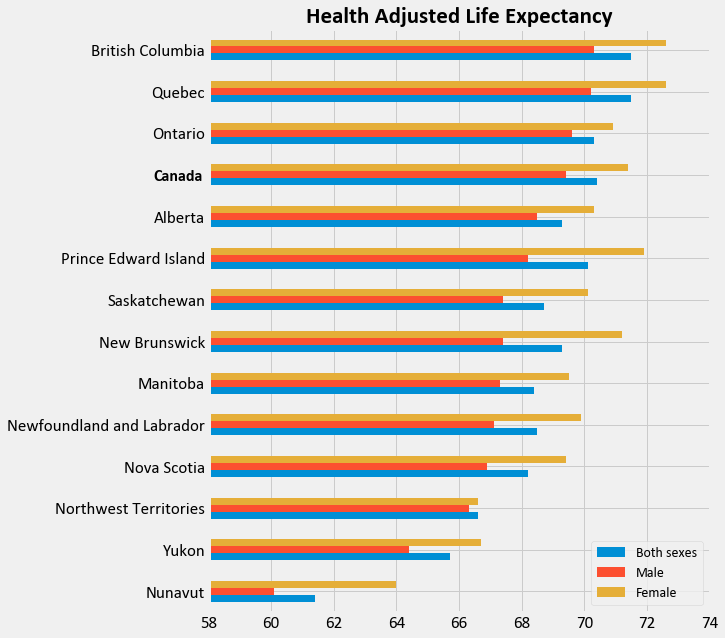

In [12]:
from matplotlib import rcParams
import matplotlib.style as style
style.use('fivethirtyeight')
def health_adjusted_life_expectancy(data):

    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Calibri']
    chart_data = data.rename(index={'Canada':''}).sort_values('Male')
    ax = chart_data.plot.barh(figsize=(8,10), grid=True);
    ax.set_ylabel('')
    ax.set_title('Health Adjusted Life Expectancy', fontsize=23, fontweight='bold')
    ax.set_xlim((58,74))
    ax.xaxis.set_tick_params(labelsize=17,)
    ax.yaxis.set_tick_params(labelsize=17)
    ax.text(x=56.25, y=9.85, s='Canada', fontsize=16, fontweight='bold')

health_adjusted_life_expectancy(health_le_data)